In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

## Building t-SNE visualization of doc-topic matrix ##

In [13]:
with open('../pickles/doc_topic_df.pkl', 'rb') as read_file:
    doc_topic_df = pickle.load(read_file)

In [25]:
with open('../pickles/blogs_df2.pkl', 'rb') as read_file:
    blogs_df = pickle.load(read_file)

In [27]:
blogs_df.head()

,title,date,num_notes,unique_pageviews,url,topic_id,topic,post_life_in_months,unique_pageviews_per_month,raw_text,raw_text_sent_tokenize,mean_sentiment_score,sentiment,word_count,beginning_mean_sentiment_score,middle_mean_sentiment_score,end_mean_sentiment_score
0,Diary Entry #33: How real are dreams?,2019-08-01,3,24.0,https://gaysiandiaries.com/post/186710050569/d...,6,family,12.70,1.89,"Since my dad passed, I had never had a dream w...","[Since my dad passed, I had never had a dream ...",0.02,neutral,780,3.81e-02,-0.02,0.04
1,Diary Entry #32: An Ocean of Healing,2019-05-15,2,60.0,https://gaysiandiaries.com/post/184906201823/d...,5,identity,15.30,3.92,"Dear Diary,\n\nI recently found myself at the ...","[Dear Diary,\n\nI recently found myself at the...",0.03,neutral,839,-4.67e-03,-0.11,0.20
2,Diary Entry #31: Breaking Free from Helplessness,2018-10-15,10,116.0,https://gaysiandiaries.com/post/179094609712/d...,7,body image,22.37,5.19,"Early on in therapy, my shrink told me to read...","[Early on in therapy, my shrink told me to rea...",0.06,positive,919,-1.52e-01,-0.08,0.37
3,"Diary Entry #30: Gay, Asian, and Aspie",2018-08-15,25,109.0,https://gaysiandiaries.com/post/177039931593/d...,4,friendship,24.40,4.47,"Dear Diary,\n\nI really wonder if I am truly m...","[Dear Diary,\n\nI really wonder if I am truly ...",0.04,neutral,1674,4.36e-02,-0.07,0.15
4,Diary Entry #29: One Asian drag queen’s take o...,2018-07-15,11,136.0,https://gaysiandiaries.com/post/175936820624/d...,2,racism,25.43,5.35,"Dear Diary,\n\nI stared at my reflection in a ...","[Dear Diary,\n\nI stared at my reflection in a...",0.10,positive,838,3.06e-01,0.07,-0.07


In [14]:
doc_topic_df.shape

(376, 8)

In [15]:
# Dropping the first document because it is an outlier in terms of unique_pageviews_per_month
doc_topic_df.drop(index=0, inplace=True)

In [16]:
doc_topic_df.shape

(375, 8)

In [18]:
tsne = TSNE(n_components=2, random_state=4444, verbose=2)

In [20]:
tsne_doc_topic = tsne.fit_transform(doc_topic_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 375 samples in 0.001s...
[t-SNE] Computed neighbors for 375 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 375 / 375
[t-SNE] Mean sigma: 0.044948
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 59.9588089, gradient norm = 0.5128016 (50 iterations in 0.056s)
[t-SNE] Iteration 100: error = 58.5323067, gradient norm = 0.5209658 (50 iterations in 0.053s)
[t-SNE] Iteration 150: error = 58.9485512, gradient norm = 0.5235854 (50 iterations in 0.051s)
[t-SNE] Iteration 200: error = 59.4098053, gradient norm = 0.5054627 (50 iterations in 0.080s)
[t-SNE] Iteration 250: error = 58.6932106, gradient norm = 0.5072725 (50 iterations in 0.049s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.693211
[t-SNE] Iteration 300: error = 0.4742172, gradient norm = 0.0026997 (50 iterations in 0.044s)
[t-SNE] Iteration 350: error = 0.4389669, gradient norm = 0.0006090 (

In [30]:
tSNE_1, tSNE_2 = zip(*tsne_doc_topic)

In [37]:
blogs_df.head()

,title,date,num_notes,unique_pageviews,url,topic_id,topic,post_life_in_months,unique_pageviews_per_month,raw_text,raw_text_sent_tokenize,mean_sentiment_score,sentiment,word_count,beginning_mean_sentiment_score,middle_mean_sentiment_score,end_mean_sentiment_score,tSNE_1,tSNE_2
0,Diary Entry #33: How real are dreams?,2019-08-01,3,24.0,https://gaysiandiaries.com/post/186710050569/d...,6,family,12.70,1.89,"Since my dad passed, I had never had a dream w...","[Since my dad passed, I had never had a dream ...",0.02,neutral,780,3.81e-02,-0.02,0.04,-17.36,-1.33
1,Diary Entry #32: An Ocean of Healing,2019-05-15,2,60.0,https://gaysiandiaries.com/post/184906201823/d...,5,identity,15.30,3.92,"Dear Diary,\n\nI recently found myself at the ...","[Dear Diary,\n\nI recently found myself at the...",0.03,neutral,839,-4.67e-03,-0.11,0.20,-3.90,2.29
2,Diary Entry #31: Breaking Free from Helplessness,2018-10-15,10,116.0,https://gaysiandiaries.com/post/179094609712/d...,7,body image,22.37,5.19,"Early on in therapy, my shrink told me to read...","[Early on in therapy, my shrink told me to rea...",0.06,positive,919,-1.52e-01,-0.08,0.37,-8.11,-13.63
3,"Diary Entry #30: Gay, Asian, and Aspie",2018-08-15,25,109.0,https://gaysiandiaries.com/post/177039931593/d...,4,friendship,24.40,4.47,"Dear Diary,\n\nI really wonder if I am truly m...","[Dear Diary,\n\nI really wonder if I am truly ...",0.04,neutral,1674,4.36e-02,-0.07,0.15,2.11,-7.47
4,Diary Entry #29: One Asian drag queen’s take o...,2018-07-15,11,136.0,https://gaysiandiaries.com/post/175936820624/d...,2,racism,25.43,5.35,"Dear Diary,\n\nI stared at my reflection in a ...","[Dear Diary,\n\nI stared at my reflection in a...",0.10,positive,838,3.06e-01,0.07,-0.07,4.38,-17.86


In [32]:
blogs_df['tSNE_1'] = tSNE_1
blogs_df['tSNE_2'] = tSNE_2

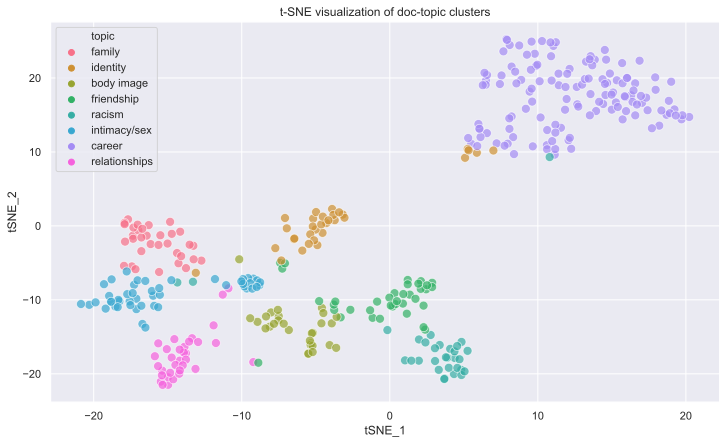

In [109]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(x='tSNE_1', y='tSNE_2', data=blogs_df, 
                hue='topic', alpha=0.7, s=80)
ax.set_title('t-SNE visualization of doc-topic clusters');

## Visualizing the sentiment sequence of Diary Entry \#5 ##

In [82]:
with open('../pickles/diary_entry_5_df.pkl', 'rb') as read_file:
    diary_entry_5_df = pickle.load(read_file)

In [98]:
heatmap_x = []
for i in range(diary_entry_5_df.shape[0]//10+1):
    for j in range(diary_entry_5_df.shape[0]//10):
        heatmap_x.append(j)
        if len(heatmap_x) == diary_entry_5_df.shape[0]:
            break
len(heatmap_x)

104

In [105]:
heatmap_y = []
for i in range(diary_entry_5_df.shape[0]//10, -1, -1):
    for j in range(diary_entry_5_df.shape[0]//10):
        heatmap_y.append(i)
        if len(heatmap_y) == diary_entry_5_df.shape[0]:
            break
len(heatmap_y)

104

In [107]:
diary_entry_5_df['heatmap_x'] = heatmap_x
diary_entry_5_df['heatmap_y'] = heatmap_y

In [127]:
condlist = [diary_entry_5_df['sentiment'] == 'positive',
            diary_entry_5_df['sentiment'] == 'neutral',
            diary_entry_5_df['sentiment'] == 'negative']
choicelist = [1, 0, -1]
diary_entry_5_df['ternary_sentiment_score'] = np.select(condlist, choicelist)

In [129]:
diary_entry_5_df.sample(5)

,sentence,section,compound_score,sentiment,heatmap_x,heatmap_y,ternary_sentiment_score
7,That was my first meeting enabled by a dating ...,beginning,0.00,neutral,7,10,0
67,"I had no idea what I was doing anymore, and I ...",middle,-0.93,negative,7,4,-1
62,I was bitter that people had boyfriends but st...,middle,-0.23,negative,2,4,-1
98,These were my series of “firsts”.,end,0.00,neutral,8,1,0
35,"I was a busy graduate student, and I rarely we...",middle,0.00,neutral,5,7,0


In [170]:
diary_entry_5_df[diary_entry_5_df['section'] == 'middle']

,sentence,section,compound_score,sentiment,heatmap_x,heatmap_y,ternary_sentiment_score
34,It was about a year and half into my graduate ...,middle,0.00,neutral,4,7,0
35,"I was a busy graduate student, and I rarely we...",middle,0.00,neutral,5,7,0
36,"In fact, I barely even went out to school part...",middle,0.40,positive,6,7,1
37,"On a Friday night, we had Brazilian food for d...",middle,0.00,neutral,7,7,0
38,All I have to say at this point is that it was...,middle,0.00,neutral,8,7,0
39,"To see the go go boys dancing, with perfect ab...",middle,0.57,positive,9,7,1
40,"Troupes of hot gay guys drinking, dancing and ...",middle,0.00,neutral,0,6,0
41,"Occasionally, I would see people I recognized ...",middle,-0.32,negative,1,6,-1
42,"Then, we went to Asian night Gameboi at the no...",middle,-0.76,negative,2,6,-1
43,I had heard of these places before and knew so...,middle,0.00,neutral,3,6,0


In [130]:
heatmap_pivot = pd.pivot_table(diary_entry_5_df, index=['heatmap_y'], columns=['heatmap_x'],
                               values=['ternary_sentiment_score'], fill_value=0)

In [132]:
# Sort my heatmap_y in descending order to preserve the correct order of 
# sentences from top to down
heatmap_pivot = heatmap_pivot.sort_values('heatmap_y', ascending=False)

In [133]:
heatmap_pivot

ternary_sentiment_score                           
heatmap_x                       0  1  2  3  4  5  6  7  8  9
heatmap_y                                                   
10                              1  0  0  1  0  1  1  0 -1  1
9                              -1 -1  1 -1  1  1  1  0  0  0
8                              -1 -1  0 -1 -1 -1 -1 -1 -1  1
7                              -1  0  1  1  0  0  1  0  0  1
6                               0 -1 -1  0  0  1  1  1  1 -1
5                               1  1  0  1 -1  1  0  1 -1 -1
4                              -1 -1 -1 -1  1 -1 -1 -1  0 -1
3                               0  0  0 -1  1  1  1  0 -1  1
2                               1  0 -1  1  1  0  0  0 -1  0
1                               1  1  0 -1  1  1  1  1  0  1
0                               1  1  1  1  0  0  0  0  0  0

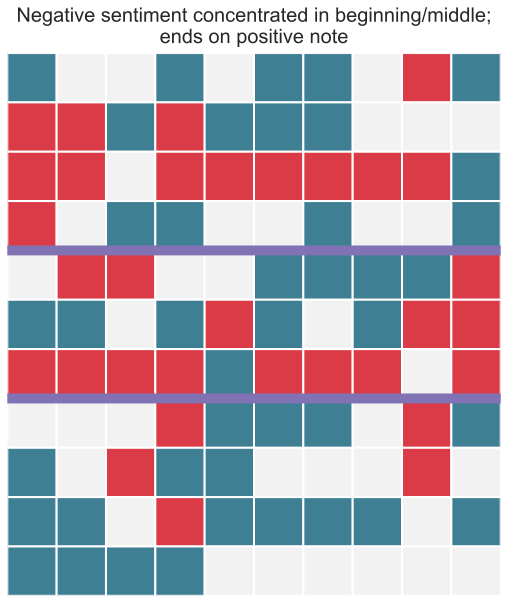

In [189]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(heatmap_pivot, cmap=cmap, square=True, 
            linewidths=2, cbar=False)
ax.axis('off')
ax.hlines([4, 7], *ax.get_xlim(), colors='m', linewidths=10)
ax.set_title('Negative sentiment concentrated in beginning/middle;\nends on positive note',
            fontsize=20, pad=10);